In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanvipenumudy","key":"487bfae60e4b65e36e1a308cf7412e23"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.5MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.3MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 30.5MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 63.1MB/s]


In [4]:
!ls

data_description.txt  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv


In [178]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [179]:
data = pd.read_csv("train.csv")

In [180]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [181]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [182]:
data = data.sample(frac=1).reset_index(drop=True)

In [183]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108,Unf,0,350,458,GasA,...,N,SBrkr,835,0,0,835,0,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,1920.0,Unf,1,366,Fa,TA,Y,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
1,1248,80,RL,NaN,12328,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,335.0,TA,TA,CBlock,TA,TA,Av,GLQ,539,Unf,0,473,1012,GasA,...,Y,SBrkr,1034,0,0,1034,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1976.0,Unf,3,888,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,169900
2,1156,20,RL,90.0,10768,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Veenker,Norm,Norm,1Fam,1Story,5,8,1976,2004,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Gd,ALQ,1157,Unf,0,280,1437,GasA,...,Y,SBrkr,1437,0,0,1437,1,0,2,0,3,1,Gd,6,Typ,1,Fa,Attchd,1976.0,RFn,2,528,TA,TA,Y,0,21,0,0,180,0,NaN,NaN,NaN,0,7,2007,WD,Normal,218000
3,311,60,RL,NaN,7685,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,112.0,TA,TA,PConc,Gd,TA,No,ALQ,518,Unf,0,179,697,GasA,...,Y,SBrkr,697,804,0,1501,0,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,1993.0,Fin,2,420,TA,TA,Y,190,63,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,165600
4,456,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Hip,CompShg,HdBoard,HdBoard,BrkFace,320.0,TA,TA,CBlock,TA,TA,No,ALQ,916,Unf,0,326,1242,GasA,...,Y,SBrkr,1242,0,0,1242,0,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1973.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal,175500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,360.0,TA,TA,CBlock,Gd,TA,No,ALQ,686,Unf,0,664,1350,GasA,...,Y,SBrkr,1334,0,0,1334,0,1,2,0,2,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,2,630,TA,TA,Y,0,16,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900
1456,520,70,RL,53.0,10918,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1926,2004,Gambrel,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,Gd,TA,No,Unf,0,Unf,0,1276,1276,GasA,...,Y,SBrkr,1276,804,0,2080,0,0,1,1,3,1,Gd,9,Typ,2,Gd,Detchd,1926.0,Unf,1,282,TA,TA,Y,0,0,0,0,145,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,234000
1457,1266,160,FV,35.0,3735,Pave,NaN,Reg,Lvl,AllPub,FR3,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,1999,1999,Hip,CompShg,MetalSd,MetalSd,BrkFace,218.0,Gd,TA,PConc,Gd,TA,No,GLQ,450,Unf,0,241,691,GasA,...,Y,SBrkr,713,739,0,1452,1,0,2,1,3,1,Gd,6,Typ,0,NaN,Detchd,1999.0,Unf,2,506,TA,TA,Y,0,34,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal,183900
1458,481,20,RL,98.0,16033,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2004,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,378.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1261,Unf,0

In [184]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [185]:
print(data['Alley'].isna().sum())
print(data['FireplaceQu'].isna().sum())
print(data['PoolQC'].isna().sum())
print(data['Fence'].isna().sum())
print(data['MiscFeature'].isna().sum())

1369
690
1453
1179
1406


In [186]:
data.shape

(1460, 81)

In [187]:
#data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace=True) 

In [188]:
#data.drop(['LotFrontage'], axis=1, inplace=True)

In [189]:
data.drop(['Id'], axis=1, inplace=True)

In [190]:
data.shape

(1460, 80)

In [191]:
# Imputing Missing Values
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [192]:
X = pd.DataFrame(data)
data = DataFrameImputer().fit_transform(X)

In [193]:
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [194]:
LE = LabelEncoder()
CateList = data.select_dtypes(include="object").columns
print(CateList)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [195]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,30,RL,85.000000,10625,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108,Unf,0,350,458,GasA,Fa,N,SBrkr,835,0,0,835,0,0,1,0,2,1,TA,5,Typ,0,Gd,Basment,1920.0,Unf,1,366,Fa,TA,Y,0,0,77,0,0,0,Gd,MnPrv,Shed,400,5,2010,COD,Abnorml,83000
1,80,RL,70.049958,12328,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,335.0,TA,TA,CBlock,TA,TA,Av,GLQ,539,Unf,0,473,1012,GasA,TA,Y,SBrkr,1034,0,0,1034,1,0,1,0,3,1,TA,6,Typ,0,Gd,Attchd,1976.0,Unf,3,888,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2010,WD,Normal,169900
2,20,RL,90.000000,10768,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Veenker,Norm,Norm,1Fam,1Story,5,8,1976,2004,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Gd,ALQ,1157,Unf,0,280,1437,GasA,TA,Y,SBrkr,1437,0,0,1437,1,0,2,0,3,1,Gd,6,Typ,1,Fa,Attchd,1976.0,RFn,2,528,TA,TA,Y,0,21,0,0,180,0,Gd,MnPrv,Shed,0,7,2007,WD,Normal,218000
3,60,RL,70.049958,7685,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,112.0,TA,TA,PConc,Gd,TA,No,ALQ,518,Unf,0,179,697,GasA,Gd,Y,SBrkr,697,804,0,1501,0,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,1993.0,Fin,2,420,TA,TA,Y,190,63,0,0,0,0,Gd,MnPrv,Shed,0,5,2006,WD,Normal,165600
4,20,RL,80.000000,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Hip,CompShg,HdBoard,HdBoard,BrkFace,320.0,TA,TA,CBlock,TA,TA,No,ALQ,916,Unf,0,326,1242,GasA,Fa,Y,SBrkr,1242,0,0,1242,0,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1973.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,9,2007,WD,Normal,175500


In [196]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,30,3,85.000000,10625,1,0,3,3,0,0,0,7,2,2,0,2,5,5,1920,1950,1,1,13,14,2,0.0,3,4,0,3,3,3,0,108,5,0,350,458,1,1,0,4,835,0,0,835,0,0,1,0,2,1,3,5,6,0,2,2,1920.0,2,1,366,1,4,2,0,0,77,0,0,0,2,2,2,400,5,2010,0,0,83000
1,80,3,70.049958,12328,1,0,0,3,0,4,0,11,2,2,0,7,6,5,1976,1976,1,1,6,6,1,335.0,3,4,1,3,3,0,2,539,5,0,473,1012,1,4,1,4,1034,0,0,1034,1,0,1,0,3,1,3,6,6,0,2,1,1976.0,2,3,888,4,4,2,0,0,0,0,0,0,2,2,2,0,5,2010,8,4,169900
2,20,3,90.000000,10768,1,0,0,3,0,0,0,24,2,2,0,2,5,8,1976,2004,1,1,9,10,2,0.0,2,2,1,2,3,1,0,1157,5,0,280,1437,1,4,1,4,1437,0,0,1437,1,0,2,0,3,1,2,6,6,1,1,1,1976.0,1,2,528,4,4,2,0,21,0,0,180,0,2,2,2,0,7,2007,8,4,218000
3,60,3,70.049958,7685,1,0,0,3,0,4,0,8,2,2,0,5,6,5,1993,1994,1,1,6,6,1,112.0,3,4,2,2,3,3,0,518,5,0,179,697,1,2,1,4,697,804,0,1501,0,0,2,1,3,1,2,6,6,1,4,1,1993.0,0,2,420,4,4,2,190,63,0,0,0,0,2,2,2,0,5,2006,8,4,165600
4,20,3,80.000000,9600,1,0,3,3,0,4,0,14,2,2,0,2,7,6,1973,1973,3,1,6,6,1,320.0,3,4,1,3,3,3,0,916,5,0,326,1242,1,1,1,4,1242,0,0,1242,0,0,1,1,3,1,3,6,6,1,4,1,1973.0,2,2,528,4,4,2,0,0,0,0,0,0,2,2,2,0,9,2007,8,4,175500


In [197]:
#from sklearn.preprocessing import StandardScaler
df = data.iloc[:,:-1]
mm = MinMaxScaler()
df[:]= mm.fit_transform(df[:])

In [198]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.058824,0.75,0.219178,0.043586,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.291667,0.25,0.285714,0.0,0.285714,0.444444,0.500,0.347826,0.000000,0.2,0.142857,0.928571,0.933333,0.666667,0.000000,1.000000,1.0,0.0,1.000000,1.0,1.000000,0.0,0.019135,1.0,0.0,0.149829,0.074959,0.2,0.25,0.0,1.0,0.114961,0.000000,0.0,0.094386,0.000000,0.0,0.333333,0.0,0.250,0.333333,1.000000,0.250000,1.0,0.000000,0.50,0.4,0.181818,1.0,0.25,0.258110,0.25,1.0,1.0,0.000000,0.000000,0.139493,0.0,0.000,0.0,1.0,0.666667,0.666667,0.025806,0.363636,1.00,0.0,0.0
1,0.352941,0.75,0.167979,0.051546,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.458333,0.25,0.285714,0.0,1.000000,0.555556,0.500,0.753623,0.433333,0.2,0.142857,0.428571,0.400000,0.333333,0.209375,1.000000,1.0,0.2,1.000000,1.0,0.000000,0.4,0.095500,1.0,0.0,0.202483,0.165630,0.2,1.00,1.0,1.0,0.160624,0.000000,0.0,0.131876,0.333333,0.0,0.333333,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.000000,0.50,0.2,0.690909,1.0,0.75,0.626234,1.00,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000,0.0,1.0,0.666667,0.666667,0.000000,0.363636,1.00,1.0,0.8
2,0.000000,0.75,0.236301,0.044254,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.25,0.285714,0.0,0.285714,0.444444,0.875,0.753623,0.900000,0.2,0.142857,0.642857,0.666667,0.666667,0.000000,0.666667,0.5,0.2,0.666667,1.0,0.333333,0.0,0.204996,1.0,0.0,0.119863,0.235188,0.2,1.00,1.0,1.0,0.253098,0.000000,0.0,0.207800,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.25,0.2,0.690909,0.5,0.50,0.372355,1.00,1.0,1.0,0.000000,0.038391,0.000000,0.0,0.375,0.0,1.0,0.666667,0.666667,0.000000,0.545455,0.25,1.0,0.8
3,0.235294,0.75,0.167979,0.029844,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.25,0.285714,0.0,0.714286,0.555556,0.500,0.876812,0.733333,0.2,0.142857,0.428571,0.400000,0.333333,0.070000,1.000000,1.0,0.4,0.666667,1.0,1.000000,0.0,0.091779,1.0,0.0,0.076627,0.114075,0.2,0.50,1.0,1.0,0.083295,0.389346,0.0,0.219857,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.00,0.2,0.845455,0.0,0.50,0.296192,1.00,1.0,1.0,0.221704,0.115174,0.000000,0.0,0.000,0.0,1.0,0.666667,0.666667,0.000000,0.363636,0.00,1.0,0.8
4,0.000000,0.75,0.202055,0.038795,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.583333,0.25,0.285714,0.0,0.285714,0.666667,0.625,0.731884,0.383333,0.6,0.142857,0.428571,0.400000,0.333333,0.200000,1.000000,1.0,0.2,1.000000,1.0,1.000000,0.0,0.162296,1.0,0.0,0.139555,0.203273,0.2,0.25,1.0,1.0,0.208352,0.000000,0.0,0.171063,0.000000,0.0,0.333333,0.5,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.00,0.2,0.663636,1.0,0.50,0.372355,1.00,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000,0.0,1.0,0.666667,0.666667,0.000000,0.727273,0.25,1.0,0.8


In [199]:
X = df.values
y = data['SalePrice'].values

In [200]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)

In [201]:
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(1460, 79)
y: Type-<class 'numpy.ndarray'>, Shape-(1460,)


In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [203]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1095, 79) (365, 79)
(1095,) (365,)


In [204]:
def predict(X, weights):
    y_pred = np.dot(X, weights)
    assert (y_pred.shape==(X.shape[0],1))
    return y_pred

In [205]:
def mean_squared_error(y_true, y_pred): 
    loss = (1/(2*y_true.shape[0])*np.sum(y_true-y_pred)**2)
    return loss

In [207]:
def gradient(X, y_true, y_pred):
    grad = np.zeros((len(X[1]),1))
    diff = y_pred-y_true
    
    for i in range(len(X[1])):
      grad[i][0] = (2/X.shape[0])*np.sum(np.dot(X[:,i],(diff)))
    return grad

In [208]:
def gradient_descent(X, y, learning_rate=0.001, max_iterations=100):

    weights = np.random.rand(len(X[1]),1)
    losses  = []
  
    y_true = y.reshape(-1,1)
    for i in range(max_iterations):
        y_pred = predict(X,weights)
        losses.append(mean_squared_error(y_true,y_pred))
        grad = gradient(X,y_true,y_pred)

        for i in range(len(X[1])):
          weights[i][0] = weights[i][0] - learning_rate*grad[i][0]
    
    return weights, losses

In [209]:
optimal_weights, losses = gradient_descent(X_train, y_train, 0.001, 200)

In [210]:
print("Root mean-squared error:", losses[-1]**(1/2))

Root mean-squared error: 5116.780901005974


In [211]:
for i in range(len(losses)):
  print(losses[i]**(1/2))

4252061.646947459
4042516.374703877
3843306.553859335
3653922.428599047
3473879.3847930254
3302716.7099821754
3139996.4145231717
2985302.1108756885
2838237.948164329
2698427.5992890783
2565513.2979925065
2439154.923419818
2319029.1298293415
2204828.5192266037
2096260.8548049429
1993048.3131800445
1894926.7735050446
1801645.1416472127
1712964.707696934
1628658.53516502
1548510.8803054355
1472316.640077629
1399880.8273359335
1331018.071903168
1265552.146251806
1203315.5145790358
1144148.9041219116
1087900.8976156774
1034427.5458524732
983591.9993490439
935264.1581809793
889320.339087488
845642.9589949148
804120.2341491983
764645.8940874308
727118.9097166365
691443.2348039845
657527.5602169725
625285.080284738
594633.2706826729
565493.6772719962
537791.7153539803
511456.478825164
486420.5587452284
462619.87085329386
439993.49159128964
418483.5022148234
398034.8405926603
378595.1603156078
360114.696754295
342546.1397231205
325844.5124245469
309967.056363987
294873.12194080633
280524.064435

In [212]:
train_pred = predict(X_train, optimal_weights)
train_pred

array([[191931.99404727],
       [172596.37961212],
       [211588.65076176],
       ...,
       [204967.81704443],
       [166346.22710897],
       [192415.28850303]])

In [213]:
y_train

array([196000, 147500, 253293, ..., 235000, 167500, 250000])

In [214]:
from sklearn.metrics import r2_score
r2_score(y_train, train_pred)

0.780601686668507

In [215]:
test_pred = predict(X_test, optimal_weights)
test_pred

array([[162556.88304305],
       [195496.11789844],
       [180261.96458508],
       [175999.69993984],
       [193853.61087341],
       [189629.53975918],
       [192515.72052878],
       [209538.59584723],
       [167099.32918656],
       [160045.03018808],
       [166002.39219318],
       [177604.95607958],
       [165107.1029288 ],
       [204499.76260336],
       [190847.94646955],
       [194507.46646616],
       [197672.11529577],
       [191752.36856147],
       [199367.25876011],
       [177537.83791162],
       [158090.4756813 ],
       [186834.96501988],
       [191905.61219174],
       [162529.51001581],
       [157655.04019759],
       [187532.14166433],
       [192587.76854211],
       [162920.40703621],
       [205187.91371539],
       [179525.29568174],
       [166584.52022589],
       [211277.58392858],
       [142479.5906685 ],
       [162128.08191581],
       [200698.66924572],
       [168368.69366314],
       [206021.77285255],
       [174511.10206326],
       [1785

In [216]:
r2_score(y_test, test_pred)

0.5985569584073501

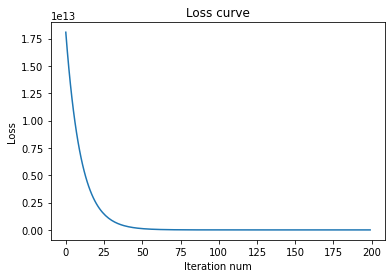

In [217]:
# Plotting loss curve
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
# Comparing with Sklearn Model
model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_train)
r2_score(y_train, pred)

0.8540160463212708

In [220]:
pred2 = model.predict(X_test)
r2_score(y_test, pred2)

0.8431209747429238